In [1]:
from tensorflow import keras
from keras.layers import (Conv2D, SeparableConv2D, DepthwiseConv2D, BatchNormalization, MaxPooling2D, SpatialDropout2D,
                          Input, Embedding, LSTM, Bidirectional, Conv1D, SpatialDropout1D, GlobalMaxPooling1D,
                          MaxPooling1D, LocallyConnected2D, Dense, Flatten, Dropout, Add)
from keras import Model
from visualize import visualize

2023-01-07 12:29:20.090701: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-07 12:29:21.522486: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-01-07 12:29:21.522606: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-01-07 12:29:21.522614: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv

In [3]:
count_map = {}


def generate_dense_blocks(features, num_blocks, input_layer, name_template="dense"):
    global count_map
    _l = input_layer
    for i in range(num_blocks):
        _l = BatchNormalization()(_l)
        count_to_use = count_map.get(name_template, 1)
        _l = Dense(features, activation='relu', name=f"{name_template}_{count_to_use}")(_l)
        count_map[name_template] = count_to_use + 1
        _l = Dropout(0.25)(_l)
    return _l

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256)]             0         
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 64)                16448     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 batch_normalization_1 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 64)                4160  

2023-01-07 12:29:43.884914: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-07 12:29:43.947792: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-07 12:29:43.948022: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-07 12:29:43.948483: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorF

{'name': 'model', 'layers': [{'class_name': 'InputLayer', 'config': {'batch_input_shape': (None, 256), 'dtype': 'float32', 'sparse': False, 'ragged': False, 'name': 'input_2'}, 'name': 'input_2', 'inbound_nodes': []}, {'class_name': 'BatchNormalization', 'config': {'name': 'batch_normalization', 'trainable': True, 'dtype': 'float32', 'axis': ListWrapper([1]), 'momentum': 0.99, 'epsilon': 0.001, 'center': True, 'scale': True, 'beta_initializer': {'class_name': 'Zeros', 'config': {}}, 'gamma_initializer': {'class_name': 'Ones', 'config': {}}, 'moving_mean_initializer': {'class_name': 'Zeros', 'config': {}}, 'moving_variance_initializer': {'class_name': 'Ones', 'config': {}}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'name': 'batch_normalization', 'inbound_nodes': [[['input_2', 0, 0, {}]]]}, {'class_name': 'Dense', 'config': {'name': 'dense_1', 'trainable': True, 'dtype': 'float32', 'units': 64, 'activation': 'relu', 'use_bias

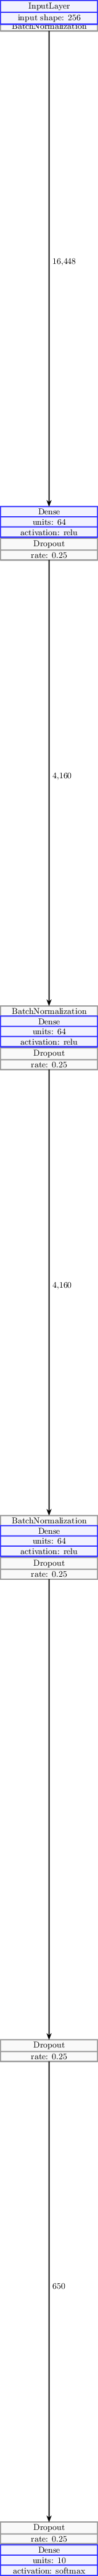

In [4]:
# Build the model
count_map = {}
activation = 'relu'
input_shape = 256
kernel = 3
pool = 2
padding = 'same'

dropout = 0.25

inputs = keras.Input(shape=input_shape)
features = 128
a = generate_dense_blocks(64, 3, inputs)
a = Dropout(0.25)(a)
a = Dropout(0.25)(a)
outputs = Dense(10, name='output', activation='softmax')(a)

model = keras.Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=['accuracy'])
model.summary()
model.save('model.h5')
visualize(model, resolution=100)

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 256)]        0           []                               
                                                                                                  
 batch_normalization_6 (BatchNo  (None, 256)         1024        ['input_3[0][0]']                
 rmalization)                                                                                     
                                                                                                  
 b_1 (Dense)                    (None, 512)          131584      ['batch_normalization_6[0][0]']  
                                                                                                  
 dropout_8 (Dropout)            (None, 512)          0           ['b_1[0][0]']              

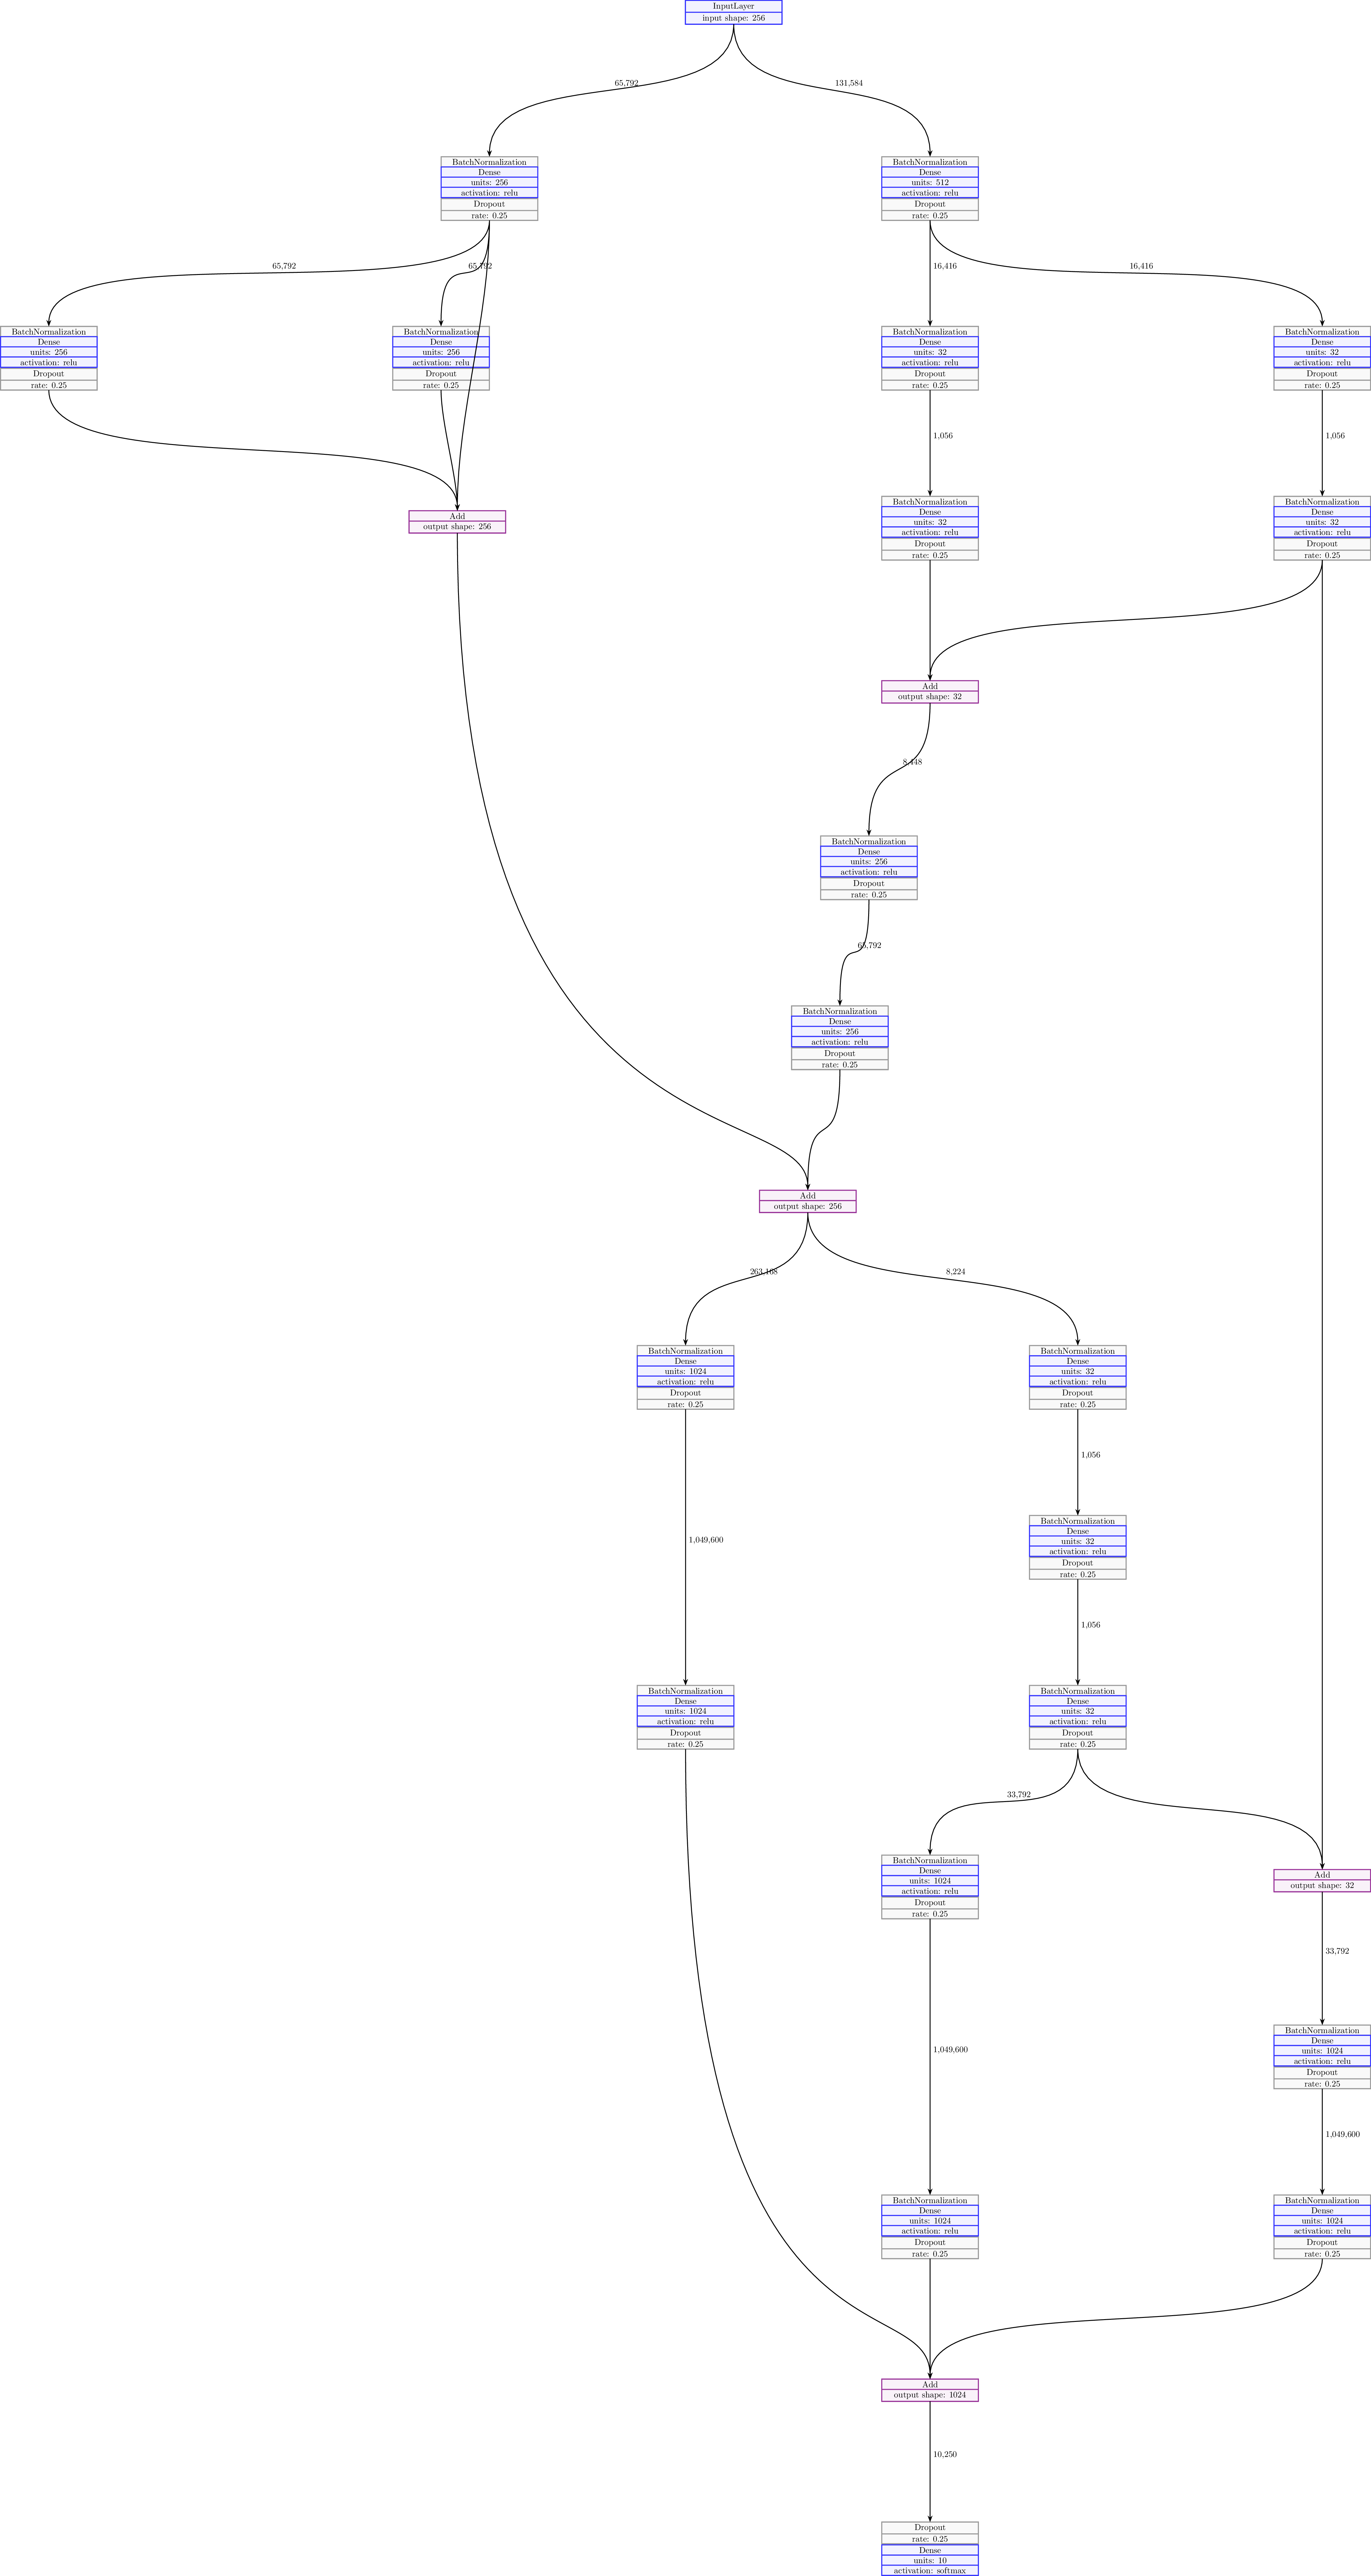

In [5]:
# Build the model
count_map = {}
activation = 'relu'
input_shape = 256
kernel = 3
pool = 2
padding = 'same'

dropout = 0.25

inputs = keras.Input(shape=input_shape)
features = 128
a = generate_dense_blocks(256, 1, inputs, name_template='a')
a1 = generate_dense_blocks(256, 1, a, name_template='a1')
a2 = generate_dense_blocks(256, 1, a, name_template='a2')
a = Add(name='sum_a')([a1, a2, a])
b = generate_dense_blocks(512, 1, inputs, name_template='b')
b1 = generate_dense_blocks(32, 2, b, name_template='b1')
b2 = generate_dense_blocks(32, 2, b, name_template='b2')
b = Add(name='sum_b')([b1, b2])
b = generate_dense_blocks(256, 2, b, name_template='b')
# c = generate_dense_blocks(features, 3, inputs, name_template='c')

a = Add(name='sum_ab')([a, b])

d = generate_dense_blocks(1024, 2, a, name_template='d')
e = generate_dense_blocks(32, 3, a, name_template='e')
# e1 = generate_dense_blocks(features, 2, e, name_template='e1')
e1 = generate_dense_blocks(1024, 2, e, name_template='e1')
e2 = Add(name="sum_b2_e")([e, b2])
e2 = generate_dense_blocks(1024, 2, e2, name_template='e2')
# f = generate_dense_blocks(features,4, a, name_template='f')
# e = Add(name='sum_e')([e1,e2])
g = Add(name='sum_d_e')([d, e1, e2])

y = Dropout(dropout, name='dropout_out')(g)
outputs = Dense(10, name='output', activation='softmax')(y)

model = keras.Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=['accuracy'])
model.summary()
visualize(model)

In [7]:
# model parameters

embedding_dim = 200
batch_size = 64

activation = 'relu'
dropout = 0.55

num_lstm_layers = 3
num_cnn_layers = 3
num_cnn_to_lstm_layers = 2
num_lstm_to_cnn_layers = 2
max_length = 50
vocabulary_size = 12000
input_shape = (max_length,)
input_length = max_length

kernel_size = 4
pool_size = 2

lstm_units = 32
cnn_filters = 128
merge_units = 128

# Building the model

input_layer = Input(shape=input_shape)
embedding_layer = Embedding(vocabulary_size, embedding_dim, input_length=input_length,
                            trainable=False)(input_layer)

block_outputs = []

# block 1 - lstm
x = SpatialDropout1D(dropout)(embedding_layer)

for i in range(num_lstm_layers - 1):
    x = BatchNormalization()(x)
    x = Bidirectional(LSTM(lstm_units, dropout=dropout, return_sequences=True))(x)
    x = SpatialDropout1D(dropout)(x)
    old_x = x

    for j in range(num_lstm_to_cnn_layers):
        x = BatchNormalization()(x)
        x = Conv1D(cnn_filters, kernel_size, activation=activation, padding='same')(x)
        x = MaxPooling1D(pool_size)(x)
        x = SpatialDropout1D(dropout)(x)

    x = GlobalMaxPooling1D()(x)
    block_outputs.append(x)
    x = old_x

x = Bidirectional(LSTM(merge_units // 2, dropout=dropout))(x)
lstm_out = Dropout(dropout)(x)

block_outputs.append(lstm_out)

# block 2 - cnn
x = SpatialDropout1D(dropout)(embedding_layer)

for i in range(num_cnn_layers - 1):
    x = BatchNormalization()(x)
    x = Conv1D(cnn_filters, kernel_size, activation=activation)(x)
    old_x = x

    for j in range(num_cnn_to_lstm_layers - 1):
        x = BatchNormalization()(x)
        x = Bidirectional(LSTM(cnn_filters, dropout=dropout, return_sequences=True))(x)
        x = SpatialDropout1D(dropout)(x)

    x = Bidirectional(LSTM(merge_units // 2, dropout=dropout))(x)
    block_outputs.append(x)

    x = MaxPooling1D(pool_size=pool_size)(old_x)
    x = SpatialDropout1D(dropout)(x)

    cnn_filters >>= 1

x = Conv1D(merge_units, kernel_size, activation=activation, padding='same')(x)
cnn_out = GlobalMaxPooling1D()(x)

block_outputs.append(cnn_out)

# merge

x = Add()(block_outputs)
x = Dropout(dropout)(x)

output_layer = Dense(3, activation='softmax')(x)

model = Model(inputs=input_layer, outputs=output_layer)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 50)]         0           []                               
                                                                                                  
 embedding_1 (Embedding)        (None, 50, 200)      2400000     ['input_5[0][0]']                
                                                                                                  
 spatial_dropout1d_12 (SpatialD  (None, 50, 200)     0           ['embedding_1[0][0]']            
 ropout1D)                                                                                        
                                                                                                  
 batch_normalization_32 (BatchN  (None, 50, 200)     800         ['spatial_dropout1d_12[0][0

{'name': 'model_3', 'layers': [{'class_name': 'InputLayer', 'config': {'batch_input_shape': (None, 50), 'dtype': 'float32', 'sparse': False, 'ragged': False, 'name': 'input_5'}, 'name': 'input_5', 'inbound_nodes': []}, {'class_name': 'Embedding', 'config': {'name': 'embedding_1', 'trainable': False, 'dtype': 'float32', 'batch_input_shape': (None, 50), 'input_dim': 12000, 'output_dim': 200, 'embeddings_initializer': {'class_name': 'RandomUniform', 'config': {'minval': -0.05, 'maxval': 0.05, 'seed': None}}, 'embeddings_regularizer': None, 'activity_regularizer': None, 'embeddings_constraint': None, 'mask_zero': False, 'input_length': 50}, 'name': 'embedding_1', 'inbound_nodes': [[['input_5', 0, 0, {}]]]}, {'class_name': 'SpatialDropout1D', 'config': {'name': 'spatial_dropout1d_12', 'trainable': True, 'dtype': 'float32', 'rate': 0.55, 'noise_shape': None, 'seed': None}, 'name': 'spatial_dropout1d_12', 'inbound_nodes': [[['embedding_1', 0, 0, {}]]]}, {'class_name': 'BatchNormalization', 'c

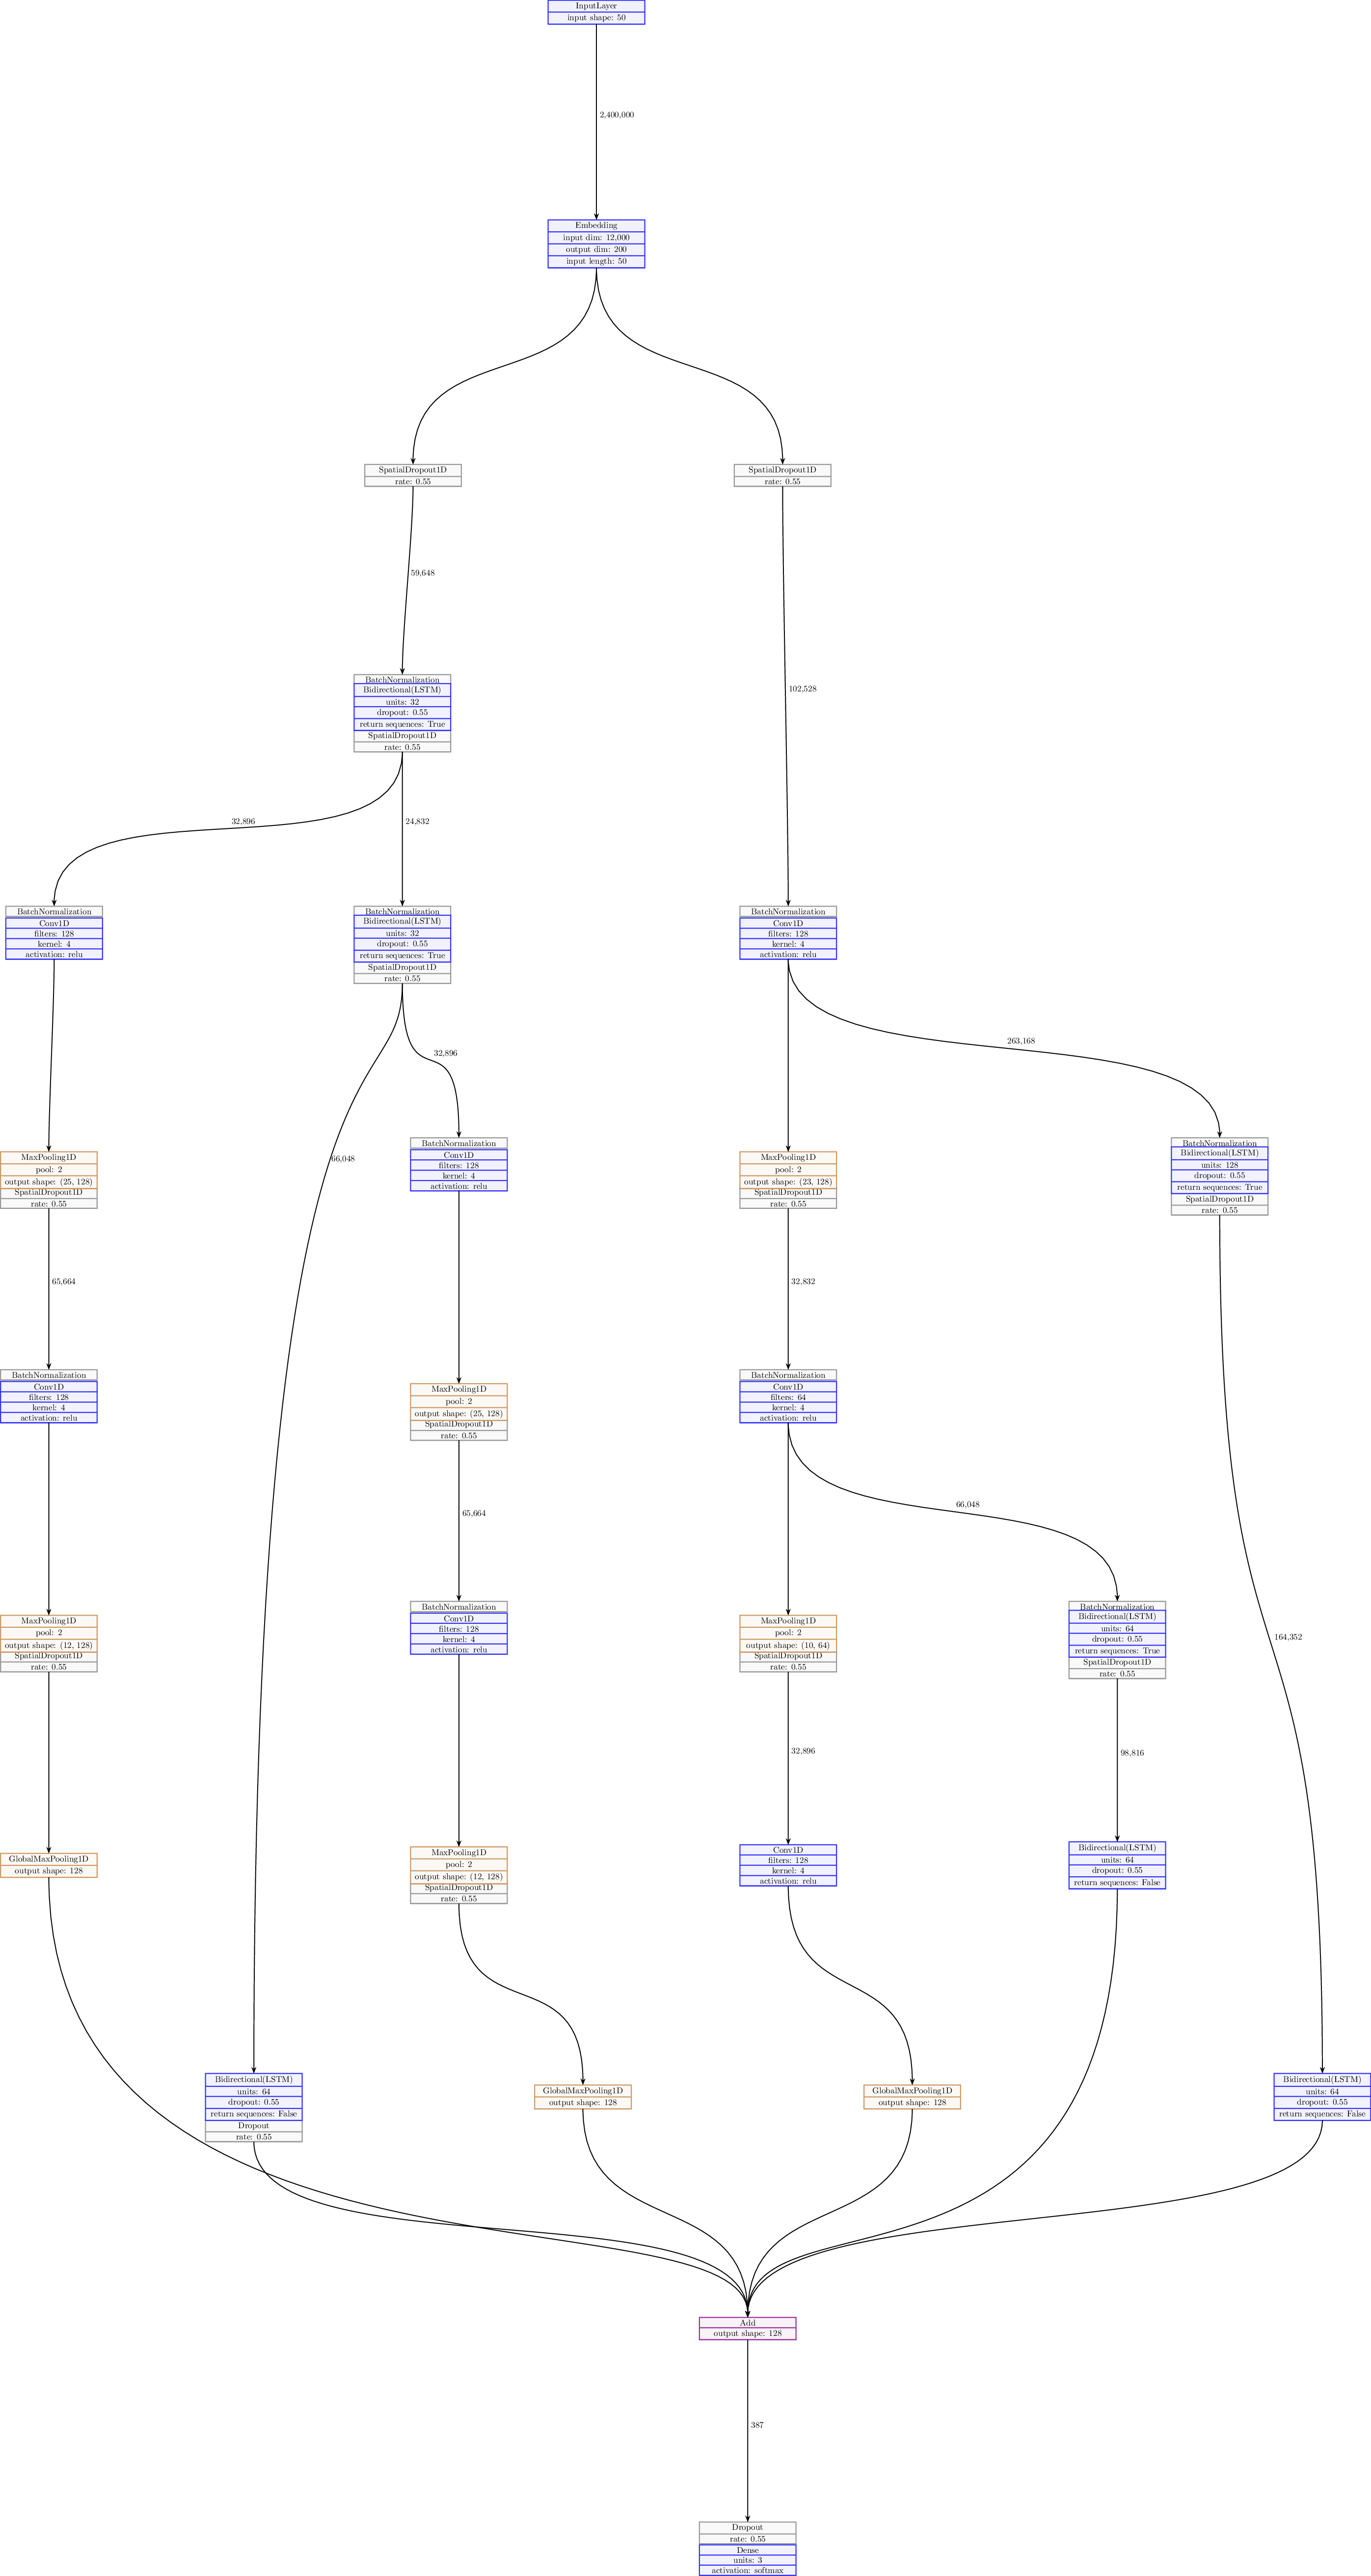

In [9]:
visualize(model, resolution=125)

In [4]:
model.save('model.h5')

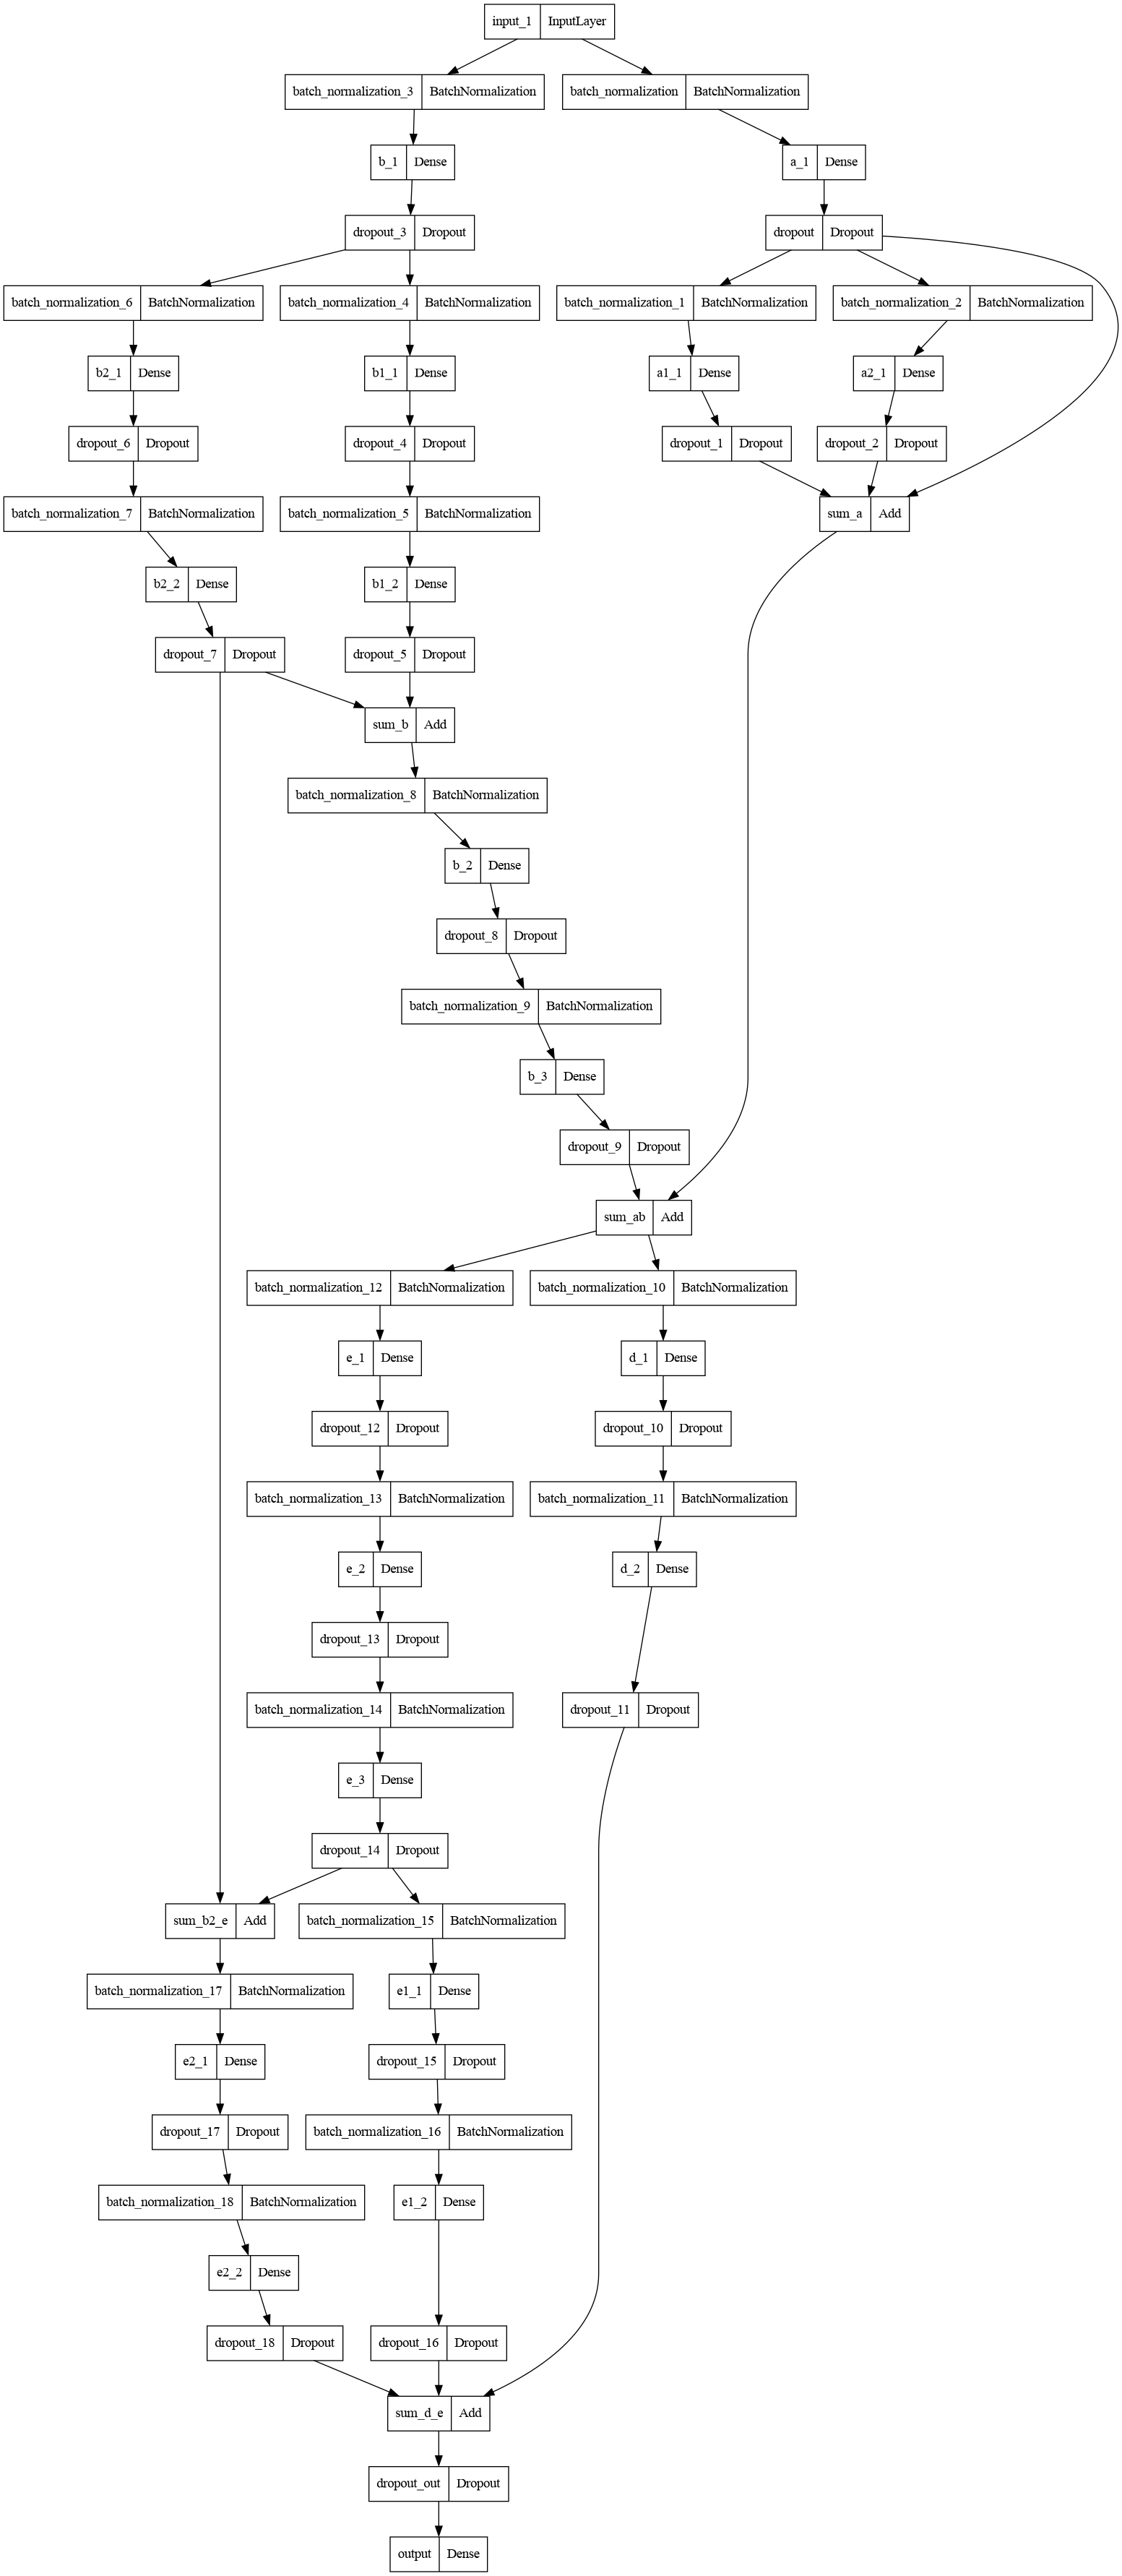

In [4]:
from keras.utils import plot_model

plot_model(model, show_shapes=False, show_dtype=False, show_layer_activations=False, show_layer_names=True)

In [18]:
model.layers[0].get_config()['batch_input_shape']

(None, 256)

In [15]:
model.get_config()

{'name': 'model',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 256),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'input_1'},
   'name': 'input_1',
   'inbound_nodes': []},
  {'class_name': 'BatchNormalization',
   'config': {'name': 'batch_normalization_3',
    'trainable': True,
    'dtype': 'float32',
    'axis': ListWrapper([1]),
    'momentum': 0.99,
    'epsilon': 0.001,
    'center': True,
    'scale': True,
    'beta_initializer': {'class_name': 'Zeros', 'config': {}},
    'gamma_initializer': {'class_name': 'Ones', 'config': {}},
    'moving_mean_initializer': {'class_name': 'Zeros', 'config': {}},
    'moving_variance_initializer': {'class_name': 'Ones', 'config': {}},
    'beta_regularizer': None,
    'gamma_regularizer': None,
    'beta_constraint': None,
    'gamma_constraint': None},
   'name': 'batch_normalization_3',
   'inbound_nodes': [[['input_1', 0, 0, {}]]]},
  {'class_name': 'Dense',
   'config

In [5]:
model.save("model.h5")